In [3]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

#for presenting maximum columns
pd.set_option('display.max_columns',None)

In [49]:
#loading dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [6]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


Observation: 
    
    Best assumption Eductaion and Education_Num is having same data with identifier.
    In corelationship if the both columns are having 1 corelation then we will drop one column.

In [22]:
#checking shape of the dataset --
df.shape

(32560, 15)

In [23]:
#checking the dtype of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Observation: here we can see some columns are having object data which can later convert into numeric with help of encoder technique for better prediction

In [21]:
#describing the data to check std dev and outliers
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Observation :
    
    - There is no null values present in data
    - Std Dev is too high hence skwness and outliers can be present.
    - after converting object in numeric we can drop columns based on corelation value

# EDA

# checking null values with graph

In [24]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

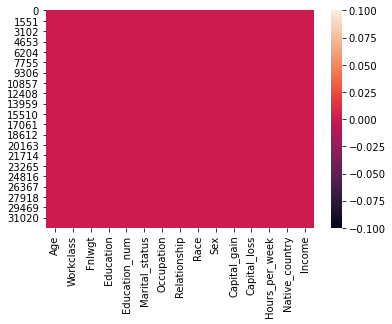

In [27]:
sns.heatmap(df.isnull())

# Checking Distinct Data in columns

In [28]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [46]:
df.Age.value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

In [50]:
df.Education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [48]:
df.Education_num.value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

Here we can see both columns are having same values hence we will drop Eductaion column

In [51]:
df.drop(columns=['Education'],axis=1,inplace=True)

In [54]:
df.Workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [55]:
df.Fnlwgt.value_counts()

203488    13
123011    13
164190    13
121124    12
148995    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: Fnlwgt, Length: 21647, dtype: int64

In [56]:
df.Marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [44]:
df.Occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [45]:
df.Workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [57]:
df.Relationship.value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [58]:
df.Race.value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [60]:
df.Capital_gain.value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1639         1
5060         1
6097         1
1455         1
7978         1
Name: Capital_gain, Length: 119, dtype: int64

In [61]:
df.Capital_loss.value_counts()

0       31041
1902      202
1977      168
1887      159
1485       51
        ...  
2467        1
1539        1
155         1
2282        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In [62]:
df.Sex.value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [63]:
df.Native_country.value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [64]:
df.Income.value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

The output shows that it is having unbalanced Data hence we will use SMOTE technique to balance the data

# Checking Corelationship

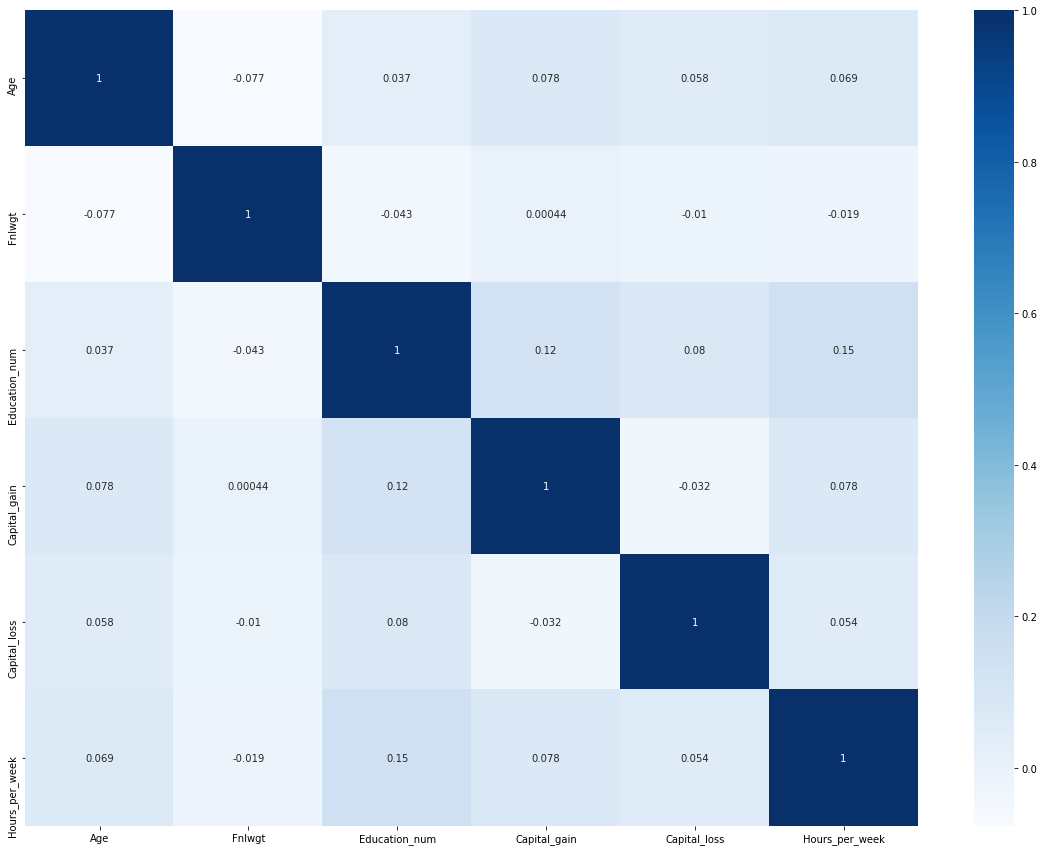

In [66]:
corr_mat=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_mat,annot=True,cmap='Blues')
plt.show()

Here we can see we are not able to find out corelation for oject columns hence first we will implemet encoder later we will check with corelation

In [67]:
df.shape

(32560, 14)

# USing label encoder technique

In [68]:
from sklearn.preprocessing  import LabelEncoder
count=1
for col in df:
    if df[col].dtype==np.number:
        continue
    df[col]=LabelEncoder().fit_transform(df[col])
    
    

In [69]:
df.head(10)

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,2925,12,2,4,0,4,1,0,0,12,39,0
1,21,4,14085,8,0,6,1,4,1,0,0,39,39,0
2,36,4,15335,6,2,6,0,2,1,0,0,39,39,0
3,11,4,19354,12,2,10,5,2,0,0,0,39,5,0
4,20,4,17699,13,2,4,5,4,0,0,0,39,39,0
5,32,4,8535,4,3,8,1,2,0,0,0,15,23,0
6,35,6,13619,8,2,4,0,4,1,0,0,44,39,1
7,14,4,1318,13,4,10,1,4,0,105,0,49,39,1
8,25,4,8459,12,2,4,0,4,1,79,0,39,39,1
9,20,4,17529,9,2,4,0,2,1,0,0,76,39,1


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education_num   32560 non-null  int64
 4   Marital_status  32560 non-null  int32
 5   Occupation      32560 non-null  int32
 6   Relationship    32560 non-null  int32
 7   Race            32560 non-null  int32
 8   Sex             32560 non-null  int32
 9   Capital_gain    32560 non-null  int64
 10  Capital_loss    32560 non-null  int64
 11  Hours_per_week  32560 non-null  int64
 12  Native_country  32560 non-null  int32
 13  Income          32560 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


Now we can see all columns are converted in numeric form

In [71]:
df.describe()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,21.580313,3.868796,10498.253256,9.080590,2.611794,6.572912,1.446376,3.665848,0.669195,6.500645,2.053348,39.377948,36.718796,0.240817
std,13.635711,1.455879,6048.727241,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,23.300419,10.056712,12.144192,7.823892,0.427586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,4.000000,5395.750000,8.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,39.000000,39.000000,0.000000
50%,20.000000,4.000000,10347.500000,9.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,39.000000,39.000000,0.000000
75%,31.000000,4.000000,15486.250000,11.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,44.000000,39.000000,0.000000
max,72.000000,8.000000,21646.000000,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,118.000000,91.000000,93.000000,41.000000,1.000000


Observation: we can see the std dev is too high hence possibilities are having skewness and outliers in the data.

    1.Comparison in Mean and 50% shows high diff hence skwness can be present.
    
    2.Comparison in 75% and Max shows high diff hence possibilies for outliers

# checking correlation

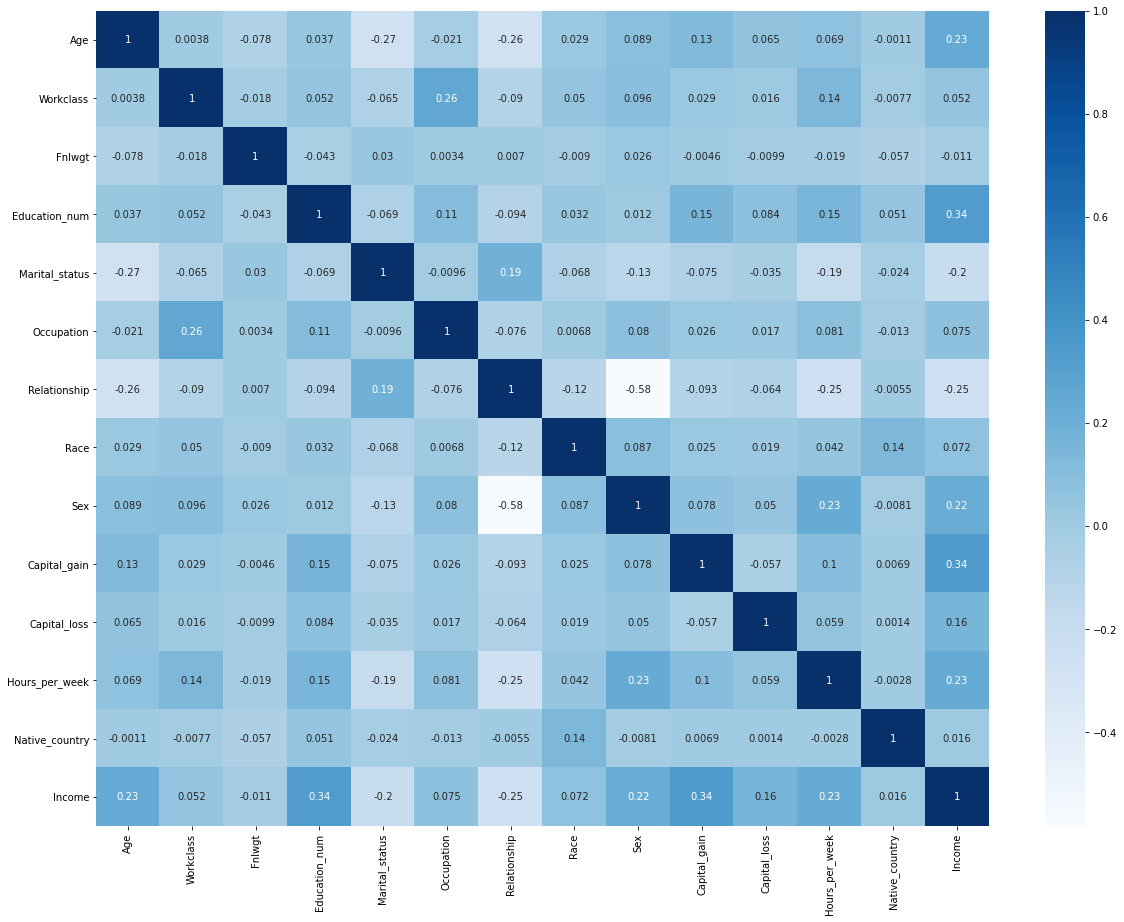

In [72]:
corr_mat=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_mat,annot=True,cmap='Blues')
plt.show()

In [73]:
corr_mat['Income'].sort_values(ascending=False)

Income            1.000000
Capital_gain      0.340034
Education_num     0.335182
Age               0.234136
Hours_per_week    0.232394
Sex               0.215995
Capital_loss      0.162511
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.010573
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

In [74]:
df123=df

Observation: 

    1. we can see Capital_gain is highly corelated and relationship is negatively corelated with income.
    2. relationship is having 0.2 negative corelation which is near to 0 so will not remove this column

# Normal distribution

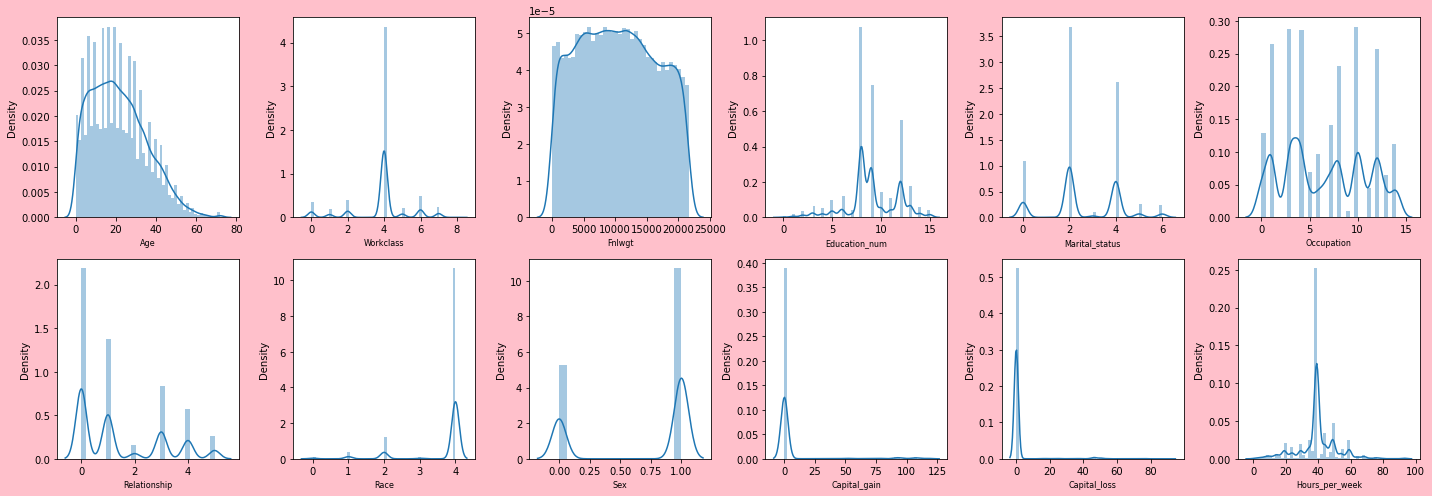

In [75]:
# checking wether te data is normally distributed or not!!!!!!!!!!!!
plt.figure(figsize=(20,7),facecolor='pink')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(2,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=8)
    
    
    plotnumber+=1
plt.tight_layout()

this shows data is not normally distributed ,data is skewed and outliers is present 

# checking and Handling Outliers

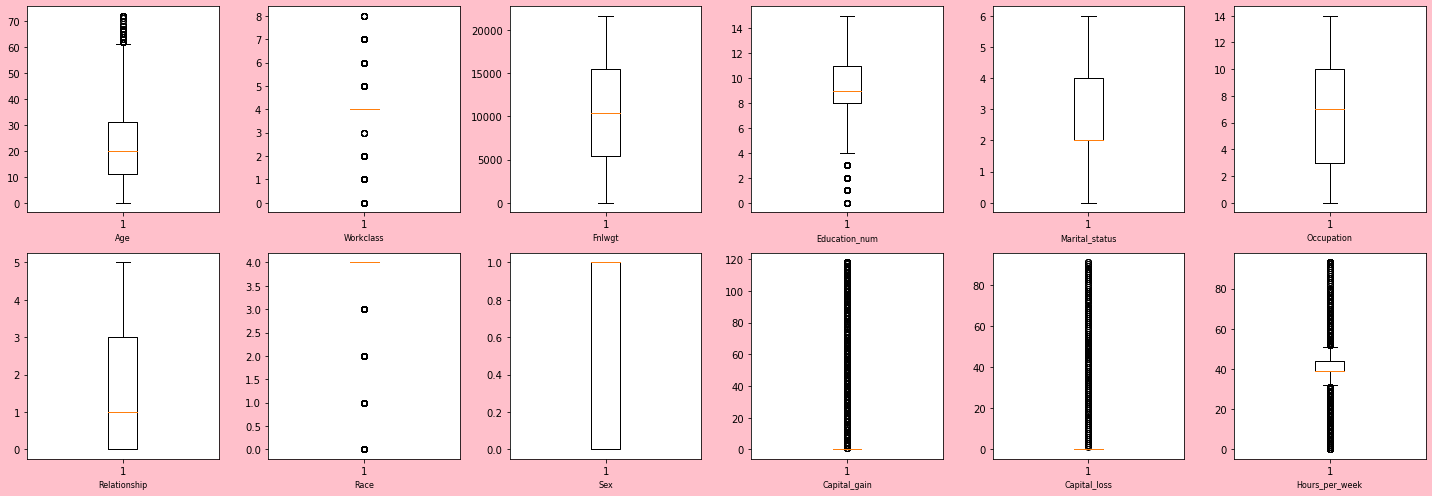

In [76]:
plt.figure(figsize=(20,7),facecolor='pink')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(2,6,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column,fontsize=8)
    
    
    plotnumber+=1
plt.tight_layout()

we can sewe have outliers present in data hence we will apply Z - score method 

# Removing outliers by zscore method

In [77]:
from scipy.stats import zscore

In [78]:
z=np.abs(zscore(df))
z

array([[0.83749664, 1.46388339, 1.25206002, ..., 2.25444135, 0.29157343,
        0.5632099 ],
       [0.042559  , 0.09012148, 0.59298455, ..., 0.03112222, 0.29157343,
        0.5632099 ],
       [1.05751055, 0.09012148, 0.79964277, ..., 0.03112222, 0.29157343,
        0.5632099 ],
       ...,
       [1.42420039, 0.09012148, 0.43253619, ..., 0.03112222, 0.29157343,
        0.5632099 ],
       [1.21596651, 0.09012148, 0.39376603, ..., 1.67802528, 0.29157343,
        0.5632099 ],
       [0.98417258, 0.77700244, 1.21114062, ..., 0.03112222, 0.29157343,
        1.77553698]])

In [79]:
threshold=3
print(np.where(z>3))

(array([    3,     7,     8, ..., 32550, 32552, 32559], dtype=int64), array([12,  9,  9, ...,  7,  7,  9], dtype=int64))


In [99]:
df1=df[(z<3).all(axis=1)]
df1

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,2925,12,2,4,0,4,1,0,0,12,39,0
1,21,4,14085,8,0,6,1,4,1,0,0,39,39,0
2,36,4,15335,6,2,6,0,2,1,0,0,39,39,0
4,20,4,17699,13,2,4,5,4,0,0,0,39,39,0
5,32,4,8535,4,3,8,1,2,0,0,0,15,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,5,4,18559,9,4,11,1,4,1,0,0,39,39,0
32555,10,4,16527,11,2,13,5,4,0,0,0,37,39,0
32556,23,4,8079,8,2,7,0,4,1,0,0,39,39,1
32557,41,4,7882,8,6,1,4,4,0,0,0,39,39,0


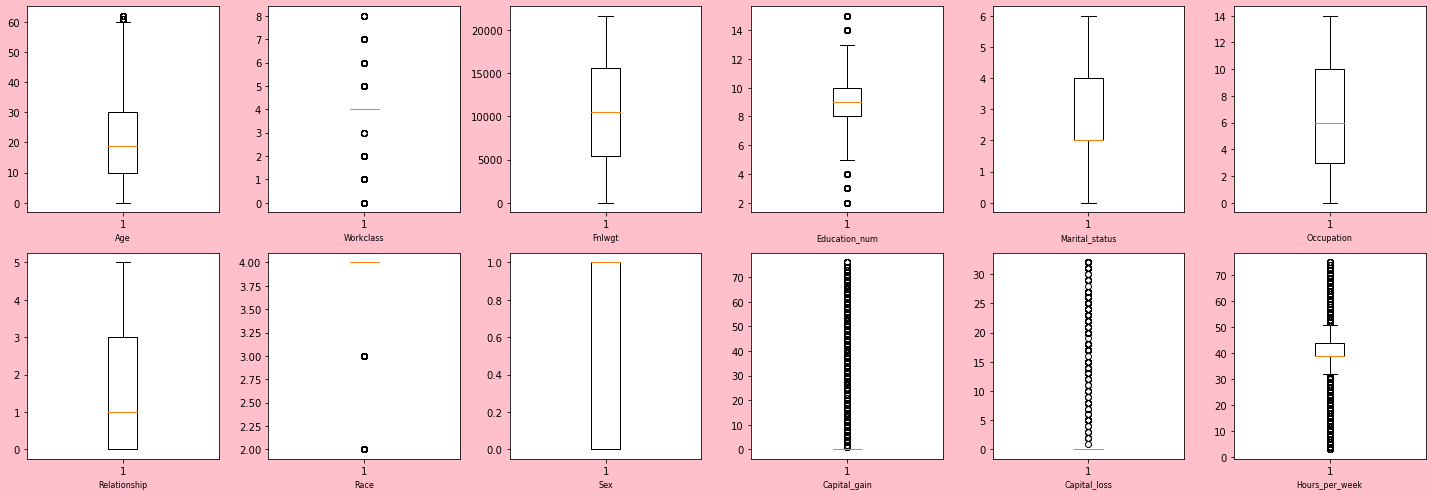

In [100]:
plt.figure(figsize=(20,7),facecolor='pink')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(2,6,plotnumber)
        plt.boxplot(df1[column])
        plt.xlabel(column,fontsize=8)
    
    
    plotnumber+=1
plt.tight_layout()

we can see the outliers are still present but its not good practise to apply z score methode twice hence we will check with skewness

In [101]:
df1['Age'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0     0.0
0.1     4.0
0.2     8.0
0.3    12.0
0.4    15.0
0.5    19.0
0.6    23.0
0.7    28.0
0.8    33.0
0.9    40.0
1.0    62.0
Name: Age, dtype: float64

we can see in every steps we have diff around 4 but on 100th we have huge diff 

In [102]:
df1['Capital_gain'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0     0.0
0.1     0.0
0.2     0.0
0.3     0.0
0.4     0.0
0.5     0.0
0.6     0.0
0.7     0.0
0.8     0.0
0.9     0.0
1.0    76.0
Name: Capital_gain, dtype: float64

In [103]:
df1.Capital_gain.unique()

array([ 0, 34, 66, 68, 11, 60,  6, 22, 26, 25,  3, 67,  8, 54, 39, 71, 36,
       50, 47, 53, 38, 59, 74, 14, 30, 24, 43, 27, 46, 28, 15, 40, 73, 61,
       51, 62,  4,  2, 42, 76, 32, 58, 12, 52, 69, 64,  7,  1, 31, 55, 48,
       56, 44,  9, 35, 37, 57, 19, 63, 13, 21, 65, 18, 45, 70, 49, 17, 10,
       72, 20, 29, 41,  5, 16, 33], dtype=int64)

In [104]:
df1['Capital_loss'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0     0.0
0.1     0.0
0.2     0.0
0.3     0.0
0.4     0.0
0.5     0.0
0.6     0.0
0.7     0.0
0.8     0.0
0.9     0.0
1.0    32.0
Name: Capital_loss, dtype: float64

In [105]:
df1.Capital_loss.unique()

array([ 0, 15, 20, 13, 17, 14, 31, 32,  6, 18, 23, 29, 27, 22, 25, 11,  5,
        2, 19,  8, 30, 24,  7, 21,  9, 12,  3, 26, 10,  4,  1, 28, 16],
      dtype=int64)

In [106]:
df1['Hours_per_week'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0     3.0
0.1    23.0
0.2    34.0
0.3    39.0
0.4    39.0
0.5    39.0
0.6    39.0
0.7    39.0
0.8    44.0
0.9    49.0
1.0    75.0
Name: Hours_per_week, dtype: float64

Here we can see we have huge diff in 0th and 100th quantile hence outlier are still present

# checking and Handling skewness

In [107]:
X=df1.drop('Income',axis=1)
y=df1.Income

In [108]:
X.shape

(26735, 13)

In [110]:
y.shape

(26735,)

In [111]:
X.skew().sort_values(ascending=False)

Capital_loss      9.786982
Capital_gain      6.044493
Relationship      0.709768
Age               0.512903
Occupation        0.136047
Fnlwgt            0.042344
Marital_status   -0.086741
Education_num    -0.150206
Hours_per_week   -0.382335
Sex              -0.649131
Workclass        -0.746686
Race             -2.524414
Native_country   -5.338005
dtype: float64

the skewness is very high so we can remove it by power transform method

# Using power_tranform method 

In [112]:
from sklearn.preprocessing import power_transform

In [113]:
x_new=power_transform(X)

In [114]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

10    8.542437
9     5.024051
12    0.548532
11    0.089866
6     0.085967
1     0.075043
3     0.034609
0    -0.116734
4    -0.144903
5    -0.182820
2    -0.266659
8    -0.649131
7    -2.466435
dtype: float64

In [115]:
pd.DataFrame(x_new,columns=X.columns).skew().sort_values(ascending=False)

Capital_loss      8.542437
Capital_gain      5.024051
Native_country    0.548532
Hours_per_week    0.089866
Relationship      0.085967
Workclass         0.075043
Education_num     0.034609
Age              -0.116734
Marital_status   -0.144903
Occupation       -0.182820
Fnlwgt           -0.266659
Sex              -0.649131
Race             -2.466435
dtype: float64

In [119]:
x=pd.DataFrame(x_new,columns=X.columns)

In [120]:
x.skew().sort_values(ascending=False)

Capital_loss      8.542437
Capital_gain      5.024051
Native_country    0.548532
Hours_per_week    0.089866
Relationship      0.085967
Workclass         0.075043
Education_num     0.034609
Age              -0.116734
Marital_status   -0.144903
Occupation       -0.182820
Fnlwgt           -0.266659
Sex              -0.649131
Race             -2.466435
dtype: float64

In [121]:
sk=x.skew()

In [122]:
sk[np.abs(sk)>0.5]

Race             -2.466435
Sex              -0.649131
Capital_gain      5.024051
Capital_loss      8.542437
Native_country    0.548532
dtype: float64

In [127]:
df.Capital_loss.value_counts()

0     31041
47      202
50      168
46      159
44       51
      ...  
81        1
1         1
80        1
48        1
79        1
Name: Capital_loss, Length: 92, dtype: int64

In [125]:
x.skew()[np.abs(x.skew())<0.5].all()

True

here we can see we are having almost 6 columns which are not in range of +-0.5 hence we will try to remove the same columns skewness with BOX COX method if it is positive

# Boxcox Method

[]

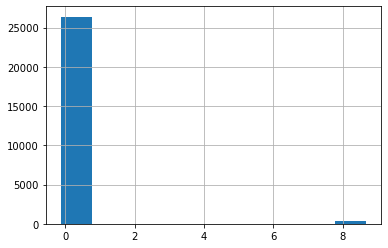

In [128]:
x['Capital_loss'].hist().plot()

In [129]:
from scipy.stats import boxcox

In [ ]:
x['Capital_loss']=boxcox(x['Capital_loss'],0)

Here we can see the BoxCOx requires the positive data and from graph we can see some of the part is in negative side

[]

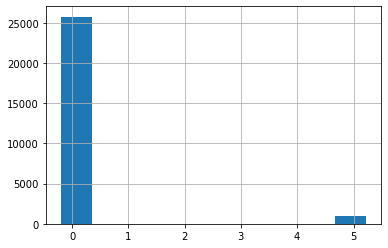

In [131]:
x['Capital_gain'].hist().plot()

Here we can see the BoxCOx requires the positive data and from graph we can see most of the part is in negative side

[]

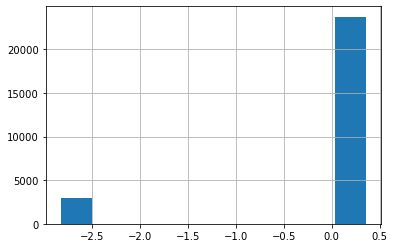

In [133]:
x['Race'].hist().plot()

In [ ]:
x['Race']=boxcox(x['Race'],0)

[]

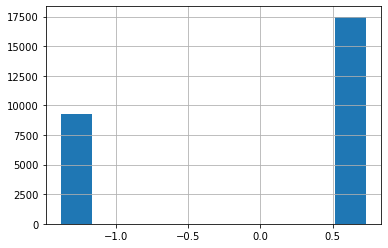

In [135]:
x['Sex'].hist().plot()

In [ ]:
x['Sex']=boxcox(x['Sex'],0)

[]

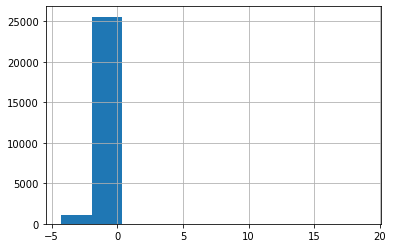

In [137]:
x['Native_country'].hist().plot()

In [ ]:
x['Native_country']=boxcox(x['Native_country'],0)

here we can see al columns are not in Positive hence we were not able to remove skewness by BOX COX method

# VIF
To check mlticolinearity present or not

In [139]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['feature']=x.columns
vif.sort_values(by='vif',ascending=False)

,vif,feature
6,1.877666,Relationship
8,1.609273,Sex
0,1.283159,Age
4,1.178894,Marital_status
11,1.147906,Hours_per_week
5,1.091990,Occupation
1,1.089731,Workclass
3,1.068675,Education_num
7,1.052490,Race
2,1.028213,Fnlwgt


there is no multicollinearity exist so we will not drop any column 

# checking unbalanced data

In [141]:
df1.Income.value_counts()

0    21646
1     5089
Name: Income, dtype: int64

we can see the output data is imbalanced so we should use SMOTE technique for balancing hence model can predict well

# SMOTE technique

In [142]:
from imblearn.over_sampling import SMOTE

In [143]:
smt=SMOTE()

In [144]:
trainx,trainy=smt.fit_resample(x,y)

In [145]:
trainy.value_counts()

0    21646
1    21646
Name: Income, dtype: int64

In [146]:
X=trainx
y=trainy

In [147]:
X.shape

(43292, 13)

In [148]:
y.shape

(43292,)

The output column is balanced Now hence moving further we will select best classifier model to predict the data as we have two unique output in Income column

# Model Selection for Classifier Data

In [149]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
#clf = MultinomialNB()
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

# LOGISTIC REGRESSION

In [150]:
# to calculate the best test_size
maxAcc=0
maxRS=0

for i in range(9,40):
    i1=i*0.01
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('accuracy',maxAcc,'random_state',i)
print("best_accuracy is ",maxAcc*100,'random_state',maxRS)      

accuracy 0.5555555555555556 random_state 9
accuracy 0.8 random_state 10
accuracy 0.8333333333333334 random_state 12
accuracy 0.85 random_state 20
accuracy 0.8611111111111112 random_state 36
best_accuracy is  86.11111111111111 random_state 36


In [151]:
# finding the best random state 
maxAcc = 0
maxRs=0

for i in range(1,500):
    x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.36,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7642114718336969 Random state 1
accuracy 0.7648530732708841 Random state 2
accuracy 0.769023482612601 Random state 3
accuracy 0.769280123187476 Random state 5
accuracy 0.7713974079301937 Random state 30
accuracy 0.7728089310920057 Random state 67
accuracy 0.7730014115231618 Random state 207
accuracy 0.7740279738226613 Random state 226
Best accuracy is 77.40279738226613 on Random state 226


In [152]:
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.36,random_state=226)
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=lr.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
#print(classification_report(y_test,predrf)*100)

Accuracy 77.40279738226613
[[569800 205400]
 [146800 636600]]


# DecisionTreeClassifier algorithm

In [153]:
# to calculate the best test_size
maxAcc=0
maxRS=0

for i in range(9,40):
    i1=i*0.01
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('accuracy',maxAcc,'random_state',i)
print("best_accuracy is ",maxAcc*100,'random_state',maxRS)      

accuracy 1.0 random_state 9
best_accuracy is  100.0 random_state 9


In [154]:
# finding the best random state 
maxAcc = 0
maxRs=0

for i in range(1,500):
    x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.09,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8627149089042854 Random state 1
accuracy 0.8663074159609956 Random state 2
accuracy 0.867590454195535 Random state 11
accuracy 0.8732358224275083 Random state 12
accuracy 0.874005645368232 Random state 17
accuracy 0.8750320759558635 Random state 37
accuracy 0.8752886836027713 Random state 146
accuracy 0.8758018988965871 Random state 364
Best accuracy is 87.58018988965871 on Random state 364


In [155]:
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.09,random_state=364)
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
acc=dt.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
#print(classification_report(y_test,predrf)*100) 

Accuracy 87.6315114190403
[[166600  25900]
 [ 22300 174900]]


# Random Forest classifier algorithm

In [156]:
# to calculate the best test_size
maxAcc=0
maxRS=0

for i in range(9,40):
    i1=i*0.01
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('accuracy',maxAcc,'random_state',i)
print("best_accuracy is ",maxAcc*100,'random_state',maxRS)      

accuracy 0.8888888888888888 random_state 9
accuracy 1.0 random_state 11
best_accuracy is  100.0 random_state 11


In [157]:
# finding the best random state 
maxAcc = 0
maxRs=0

for i in range(1,50):
    x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.11,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.9002729372244384 Random state 1
accuracy 0.913289943313038 Random state 2
accuracy 0.9206382532017636 Random state 12
Best accuracy is 92.06382532017636 on Random state 12


In [159]:
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.11,random_state=12)
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=rf.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
#print(classification_report(y_test,predrf)*100) 

Accuracy 92.14780600461894
[[215700  22300]
 [ 15100 223200]]


# KNeighborsClassifier algorithm

In [161]:
# to calculate the best test_size
maxAcc=0
maxRS=0

for i in range(11,40):
    i1=i*0.01
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=i)
    knc=KNeighborsClassifier()
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    acc=knc.score(x_test,y_test)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('accuracy',maxAcc,'random_state',i)
print("best_accuracy is ",maxAcc*100,'random_state',maxRS)      

accuracy 1.0 random_state 11
best_accuracy is  100.0 random_state 11


In [ ]:
# finding the best random state 
maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.11,random_state=i)
    knc=KNeighborsClassifier()
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    acc=knc.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

In [165]:
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.11,random_state=68)
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
acc=knc.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
#print(classification_report(y_test,predrf)*100) 

Accuracy 86.39512912030233
[[177900  53400]
 [ 11400 233600]]


we can see random forest is giving highest accuracy hence we will check all models with cross validation to see overfotting and underfitting Data 

accordingly will select model for hyper parameter tunning

# Using  cross validation score :

In [166]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,X,y,cv=5)
print('cross vaidation score',scr.mean())

cross vaidation score 0.765430323231455


In [167]:
#checking for desicionTereeClassifier
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt,X,y,cv=5)
print('cross vaidation score',scr.mean())

cross vaidation score 0.8534627558879782


In [168]:
#checking for randomforest
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf,X,y,cv=5)
print('cross vaidation score',scr.mean())

cross vaidation score 0.9017389069935554


In [169]:
#checking for knc
from sklearn.model_selection import cross_val_score
scr=cross_val_score(knc,X,y,cv=5)
print('cross vaidation score',scr.mean())

cross vaidation score 0.8639936026354782


we can See in Cross validation, Random forest is giving highest accuracy hence we will continue with Hyperparameter tunning 

# Using Hyperparameter tunning

In [170]:
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()

params={'max_features':['auto','sqrt','log2'],
       'max_depth':[10,15],
       'criterion':['gini','entropy']
       }

grd=GridSearchCV(clf,param_grid=params,cv=5,scoring='accuracy')

grd.fit(x_train,y_train)

print('best_params:',grd.best_params_)

clf=grd.best_estimator_

clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

rf_conf_mat=confusion_matrix(y_test,y_pred)

print(rf_conf_mat)

print(accuracy_score(y_test,y_pred))


best_params: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto'}
[[1911  402]
 [ 141 2309]]
0.8859962208692


In [173]:
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.11,random_state=12)  
rf_final=RandomForestClassifier(criterion= 'gini', max_depth= 15, max_features= 'auto')
rf_final.fit(x_train,y_train)
pred=rf_final.predict(x_test)
acc=rf_final.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
#print(classification_report(y_test,pred)*100)

Accuracy 89.56539995800966
[[200900  37100]
 [ 12600 225700]]


FInal Accuracy is 89.56% for Random forest algorithm

# Plot the ROC corve

To see accuracy matrix in grapghical represenation

In [189]:
y_pred = rf_final.predict(x_test)

In [190]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
tpr,fpr,thresholds=roc_curve(y_test,y_pred)

In [191]:
fpr,tpr,thresholds

(array([0.        , 0.94712547, 1.        ]),
 array([0.        , 0.15588235, 1.        ]),
 array([2, 1, 0]))

In [192]:
print("threshold",thresholds)
print("False positive rate",fpr)
print('True positive rate',tpr)

threshold [2 1 0]
False positive rate [0.         0.94712547 1.        ]
True positive rate [0.         0.15588235 1.        ]


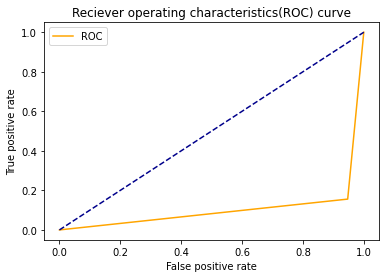

In [193]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operating characteristics(ROC) curve')
plt.legend()
plt.show()

# AUC score

In [194]:
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score*100)

89.56215595764114


# Classification Report

In [195]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      2380
           1       0.86      0.95      0.90      2383

    accuracy                           0.90      4763
   macro avg       0.90      0.90      0.90      4763
weighted avg       0.90      0.90      0.90      4763



# Saving the model in pickel format

In [196]:
import joblib
joblib.dump(accuracy_score(y_test, pred)*100,"census.pkl")

['census.pkl']

# Testing Model with Future Data for output

In [197]:
X.iloc[0]

Age               0.931927
Workclass         1.660919
Fnlwgt           -1.292296
Education_num     1.290414
Marital_status   -0.400318
Occupation       -0.480194
Relationship     -1.134474
Race              0.354516
Sex               0.726800
Capital_gain     -0.191736
Capital_loss     -0.115507
Hours_per_week   -2.192978
Native_country    0.176740
Name: 0, dtype: float64

In [198]:
y.iloc[0]

0

In [199]:
t=np.array([0.931927,1.660919,-1.292296,1.290414,-0.400318,-0.480194,-1.134474,0.354516,0.726800,-0.191736,-0.115507,-2.192978,0.176740])

In [200]:
t.shape

(13,)

In [201]:
x_train.shape

(38529, 13)

In [202]:
t=t.reshape(1,-1)
t.shape

(1, 13)

In [203]:
rf_final.predict(t)

array([0])

Hence we can see the acutal and predict output are matching 